# 6. Morphological Image Processing

This notebook will examine non-linear operations related to the shape or morphology of features in an image. In this type of processing, a small template image is used to probe the input image, as a structuring element. The template image traverses the input image and compares each neighborhood to another with a set operator.

## The Scikit-Image Morphology Module

<strong>Erosion</strong> is an operation that shrinks the size of the foreground objects, smooths object boundaries, and removes small objects.

The book works in this section nearly entirely with binary images; that's not as useful for us so I'm going to skim this bit.

In [1]:
%matplotlib inline
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion, rectangle

def plot_image(image, title=''):
    plt.title(title, size=20)
    plt.imshow(image)
    plt.axis('off')

In [24]:
def plot_images_horizontally(original, filtered, filter_name, sz=(18,7)):
    plt.gray()
    plt.figure(figsize = sz)
    plt.subplot(1,2,1), plot_image(original, 'original')
    plt.subplot(1,2,2), plot_image(filtered, filter_name)
    plt.show()

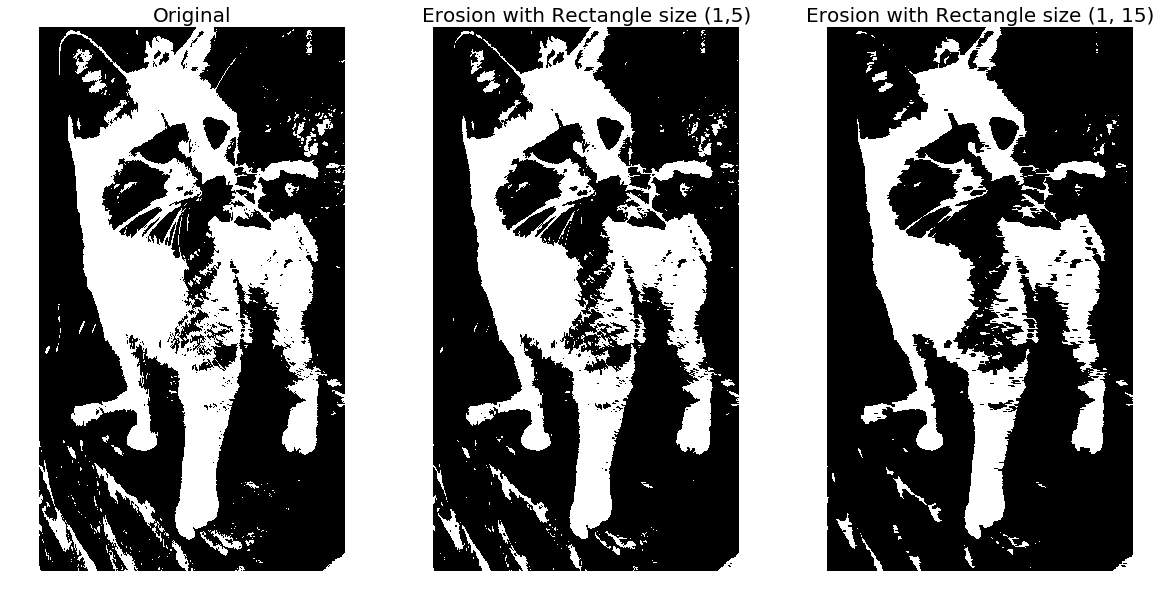

In [15]:
img = rgb2gray(imread('./img/kolya.jpg'))
img[img <= 0.5] = 0
img[img > 0.5] = 1
plt.gray()
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plot_image(img, 'Original')
img1 = binary_erosion(img, rectangle(1, 5))
plt.subplot(1, 3, 2)
plot_image(img1, 'Erosion with Rectangle size (1,5)')
img1 = binary_erosion(img, rectangle(1, 15))
plt.subplot(1, 3, 3)
plot_image(img1, "Erosion with Rectangle size (1, 15)")
plt.show()

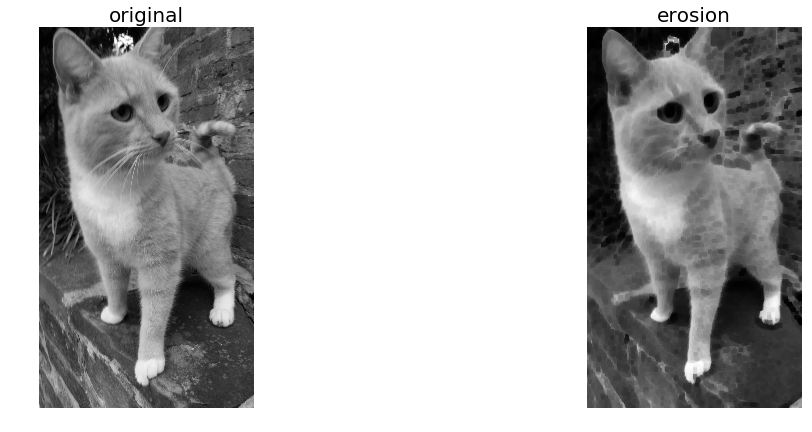

In [34]:
from skimage.morphology import square
from skimage.morphology import dilation, erosion, closing, opening, square
img = imread('./img/kolya.jpg')
img = rgb2gray(img)
struct_elem = square(20)
eroded = erosion(img, struct_elem)
plot_images_horizontally(img, eroded, 'erosion')

<strong>Dilation</strong> <em>expands</em> foreground objects where erosion shrunk them. Dilation also smooths boundaries, closes holes & gaps in binary images.

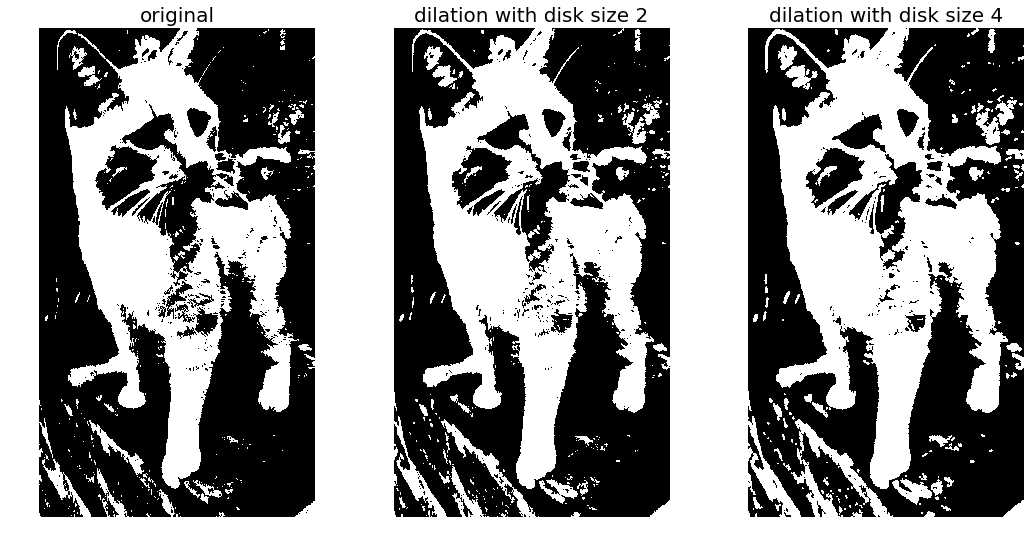

In [23]:
from skimage.morphology import binary_dilation, disk
from skimage import img_as_float
img = rgb2gray(img_as_float(imread('./img/kolya.jpg')))
img[img <= 0.5] = 0
img[img > 0.5] = 1
plt.gray()
plt.figure(figsize=(18,9))
plt.subplot(131)
plt.imshow(img)
plt.title('original', size=20)
plt.axis('off')
for d in range(1,3):
    plt.subplot(1,3,d+1)
    im1 = binary_dilation(img, disk(2*d))
    plt.imshow(im1)
    plt.title('dilation with disk size ' + str(2*d), size=20)
    plt.axis('off')
plt.show() 

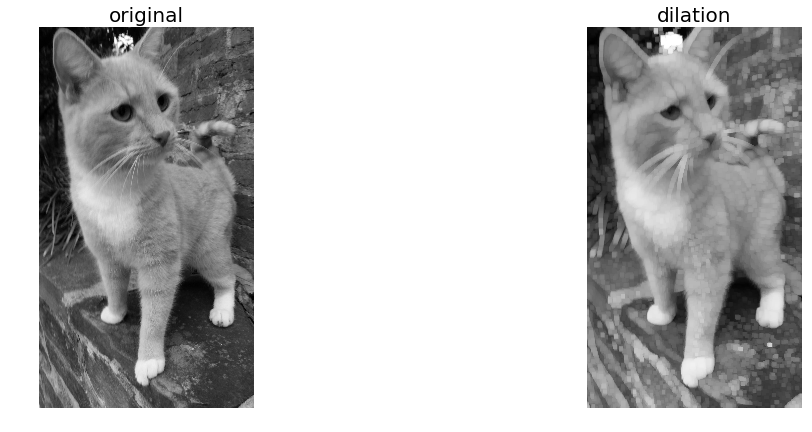

In [35]:
dilated = dilation(img, struct_elem)
plot_images_horizontally(img, dilated, 'dilation')

<strong>Opening</strong> is removal of small objects, while <strong>closing</strong> is the removal of holes


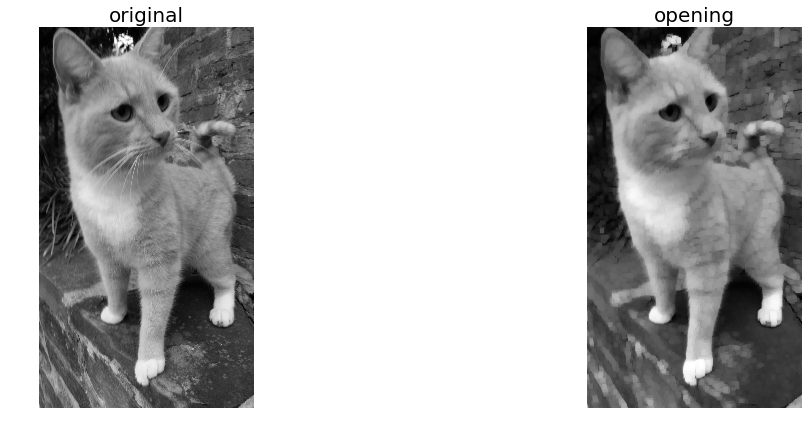

In [36]:
opened = opening(img, struct_elem)
plot_images_horizontally(img, opened, 'opening')

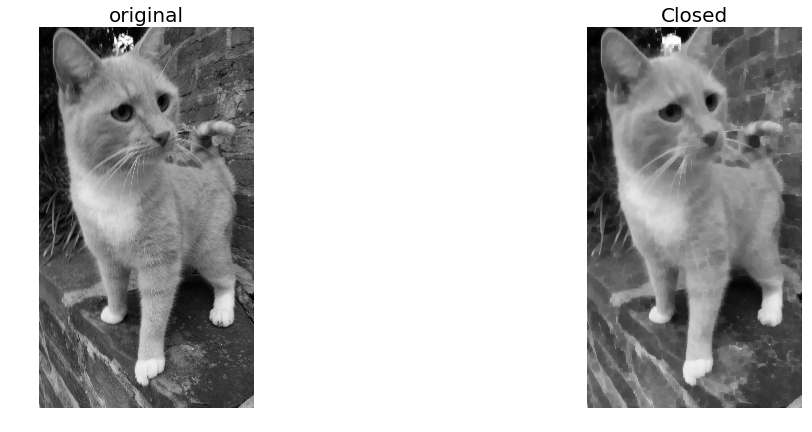

In [37]:
closed = closing(img, struct_elem)
plot_images_horizontally(img, closed, 'Closed')

## The filter.rank module

This module provides a few morphological filters

### Morphological Contrast Enhancement

This filter operates on each pixel considering only the neighboring pixels defined by a structuring element, similar to the template image from earlier. The central pixel in the neighborhood gets replaced by the local min or max, depending on which the central pixel is closest to. Let's have a look.

In [54]:
from skimage.filters.rank import enhance_contrast
from skimage import exposure, io
import numpy as np
def plot_gray_image(ax, image, title):
    ax.imshow(image, vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis('off')
    ax.set_adjustable('box-forced')

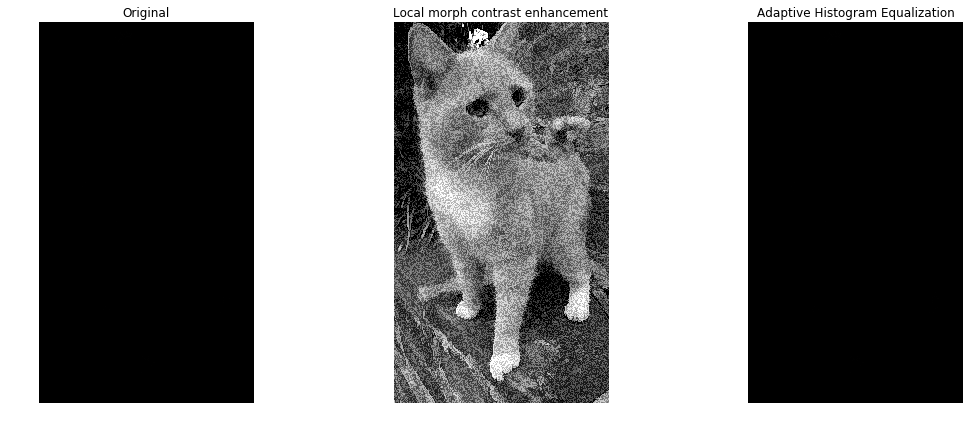

In [57]:
img = rgb2gray(img_as_float(imread('./img/kolya.jpg')) )
sigma = 0.05
noisy = np.clip(img + sigma * np.random.standard_normal(img.shape), 0, 1)
enhanced_image = enhance_contrast(noisy, disk(5))
eq_img = exposure.equalize_adapthist(noisy)
fig, axes = plt.subplots(1, 3, figsize=(18, 7) sharex='row', sharey='row')
plot_gray_image(axes[0], noisy, 'Original')
plot_gray_image(axes[1], enhanced_image, 'Local morph contrast enhancement')
plot_gray_image(axes[2], eq_img, 'Adaptive Histogram Equalization')

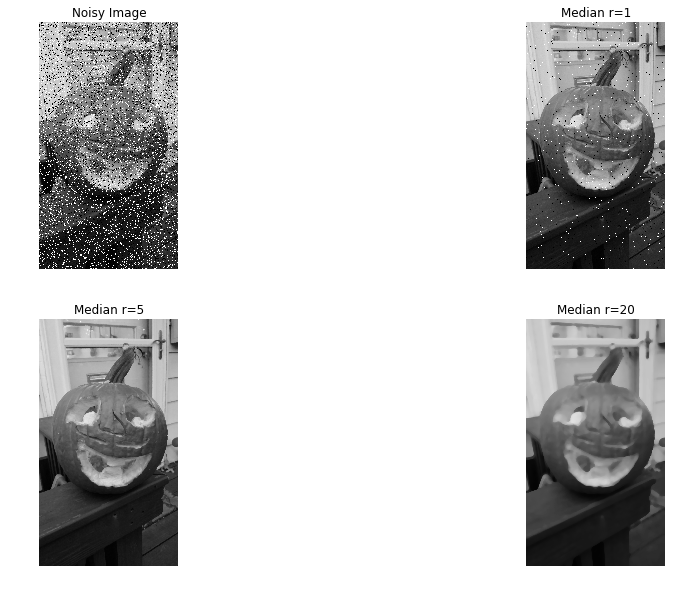

In [62]:
from skimage.filters.rank import median
from skimage.morphology import disk
noisy = (rgb2gray(imread("./img/pumpkin.jpg"))*255).astype(np.uint8)
noise = np.random.random(noisy.shape)
noisy[noise > 0.9] = 255
noisy[noise < 0.1] = 0
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = axes.ravel()
plot_gray_image(ax1, noisy, 'Noisy Image')
plot_gray_image(ax2, median(noisy, disk(1)), "Median r=1")
plot_gray_image(ax3, median(noisy, disk(5)), "Median r=5")
plot_gray_image(ax4, median(noisy, disk(20)), "Median r=20")

### Computing Local Entropy

Entropy is defined as the amount of uncertainty or randomness in an image. It is defined as: $$H = -\sum_{i=0}^{255}p_i log_2 p_i$$ where $p_i$ is the probability (obtained from the normalized histogram of the image) associated with the gray level, i. Programmatically, this is performed by `skimage.rank.entropy()`

/home/ben/.local/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


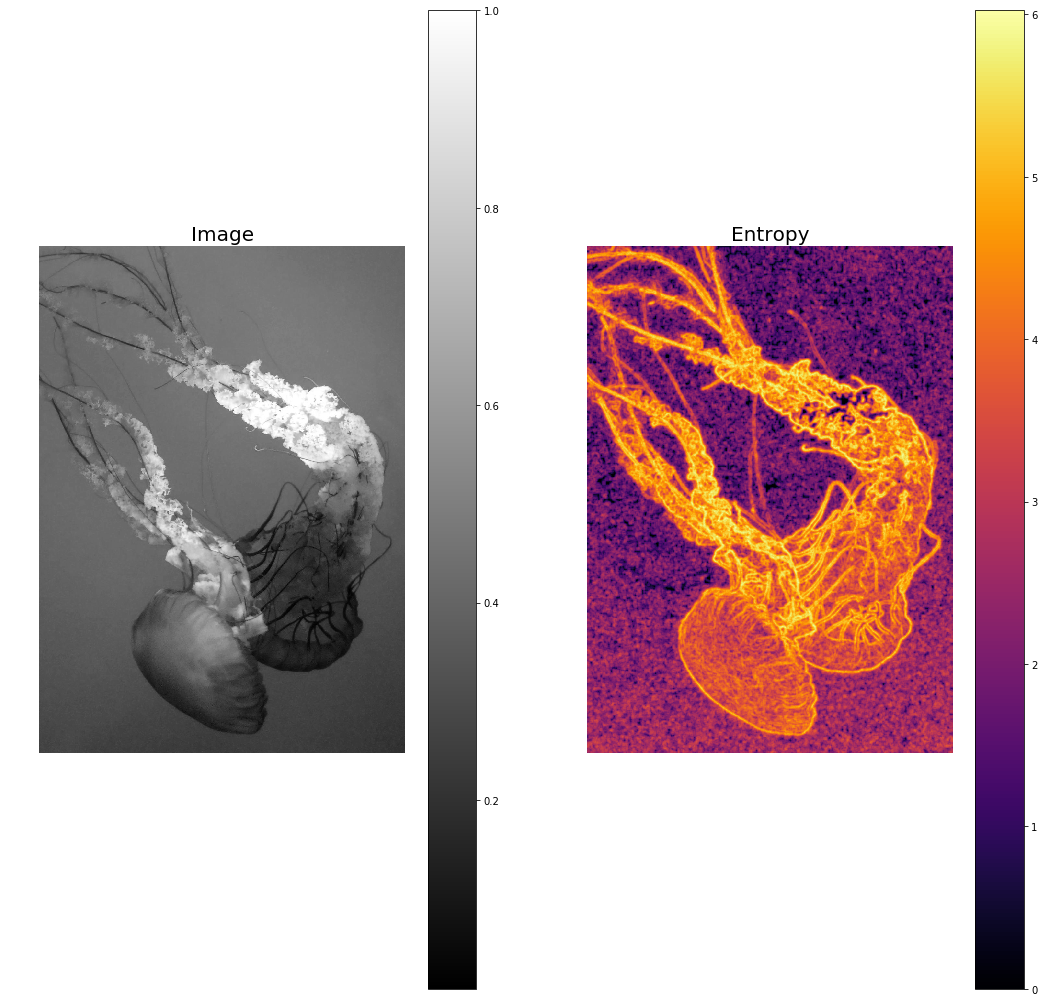

In [64]:
from skimage.morphology import disk
from skimage.filters.rank import entropy
img = rgb2gray(imread('./img/jellyfish_crop.jpg'))
fig, axes = plt.subplots(1, 2, figsize=(18, 18), sharex=True, sharey=True)
fig.colorbar(axes[0].imshow(img, cmap=plt.cm.gray), ax=axes[0])
axes[0].axis('off')
axes[0].set_title('Image', size=20)
axes[0].set_adjustable('box-forced')
fig.colorbar(axes[1].imshow(entropy(img, disk(5)), cmap=plt.cm.inferno), ax=axes[1])
axes[1].axis('off')
axes[1].set_title('Entropy', size=20)
axes[1].set_adjustable('box-forced')
plt.show()

## The scipy ndimage.morphology Module

The morphological <strong>Beucher</strong> gradient. This is a difference image of the dilated and eroded version of an input image. 

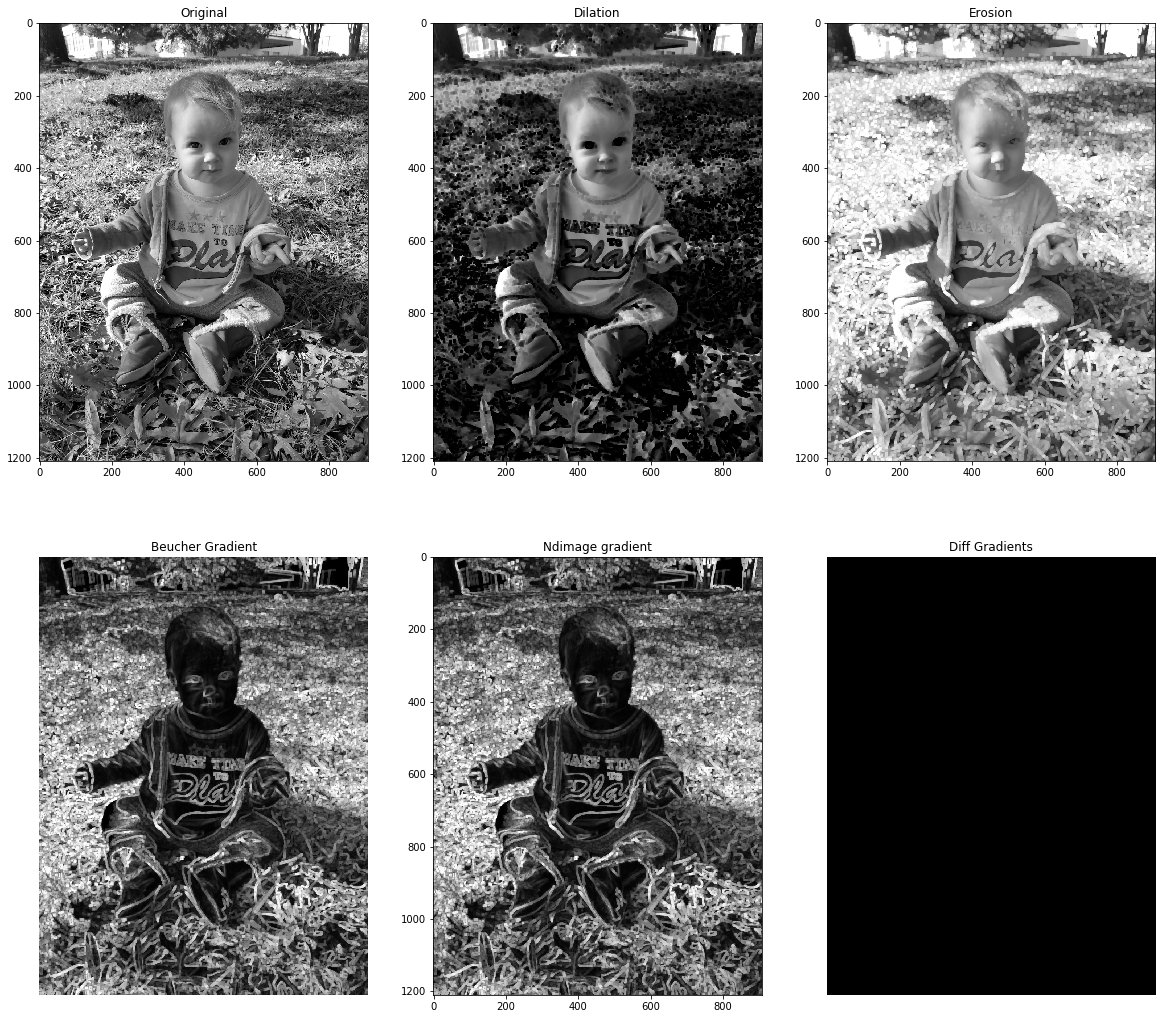

In [66]:
from scipy import ndimage
img = rgb2gray(imread('./img/Uli.jpg'))
im_d = ndimage.grey_dilation(img, size=(6, 6))
im_e = ndimage.grey_erosion(img, size=(6, 6))
im_bg = im_d - im_e
img_g = ndimage.morphological_gradient(img, size=(6, 6))
plt.gray()
plt.figure(figsize=(20, 18))
plt.subplot(231)
plt.imshow(img)
plt.title('Original')
plt.subplot(232)
plt.imshow(im_e)
plt.title("Dilation")
plt.subplot(233)
plt.imshow(im_d)
plt.title("Erosion")
plt.subplot(234)
plt.axis('off')
plt.imshow(im_bg)
plt.title('Beucher Gradient')
plt.subplot(235)
plt.imshow(img_g)
plt.title('Ndimage gradient')
plt.subplot(236)
plt.title("Diff Gradients")
plt.imshow(im_bg - img_g)
plt.axis('off')
plt.show()